# 1. Importation des librairies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix

# 2. Chargement du dataset

In [3]:
dataset = pd.read_csv('./Fichiers de données/MalwareArtifacts.csv.xls')

In [4]:
dataset

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
0,10407,9,6,6,33088,262144,4,952,1
1,5354,9,6,6,33088,262144,4,952,1
2,58807,9,6,6,33088,262144,4,136490,1
3,25166,9,6,6,33088,262144,4,1940,1
4,70387,9,6,6,33088,262144,4,83098,1
...,...,...,...,...,...,...,...,...,...
137439,123291,11,0,5,33088,1048576,5,81654,0
137440,40000,2,6,1,32768,1048576,8,67624,0
137441,59610,10,0,5,33088,1048576,5,22648,0
137442,51216,2,0,1,0,1048576,8,2216,0


In [5]:
for _ in ['AddressOfEntryPoint', 'MajorLinkerVersion', 'MajorImageVersion', 'MajorOperatingSystemVersion', 'DllCharacteristics', 'SizeOfStackReserve', 'NumberOfSections', 'ResourceSize', 'legitimate']:
    if not(_) in dataset.columns:
        print(f"{_} n'existe pas")

In [6]:
dataset.shape

(137444, 9)

# 3. Prétraitement des données

In [7]:
# Nature de chacune des features
dataset.dtypes

AddressOfEntryPoint            int64
MajorLinkerVersion             int64
MajorImageVersion              int64
MajorOperatingSystemVersion    int64
DllCharacteristics             int64
SizeOfStackReserve             int64
NumberOfSections               int64
ResourceSize                   int64
legitimate                     int64
dtype: object

In [8]:
# Nombre de valeurs manquantes
dataset.isnull().sum()

AddressOfEntryPoint            0
MajorLinkerVersion             0
MajorImageVersion              0
MajorOperatingSystemVersion    0
DllCharacteristics             0
SizeOfStackReserve             0
NumberOfSections               0
ResourceSize                   0
legitimate                     0
dtype: int64

In [9]:
# Suppression des valeurs manquantes
dataset = dataset.dropna()

In [10]:
# Suppression des données dupliquées
dataset.drop_duplicates(inplace=True)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32670 entries, 0 to 137429
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   AddressOfEntryPoint          32670 non-null  int64
 1   MajorLinkerVersion           32670 non-null  int64
 2   MajorImageVersion            32670 non-null  int64
 3   MajorOperatingSystemVersion  32670 non-null  int64
 4   DllCharacteristics           32670 non-null  int64
 5   SizeOfStackReserve           32670 non-null  int64
 6   NumberOfSections             32670 non-null  int64
 7   ResourceSize                 32670 non-null  int64
 8   legitimate                   32670 non-null  int64
dtypes: int64(9)
memory usage: 2.5 MB


In [12]:
dataset.describe()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
count,3.267000e+04,32670.000000,32670.000000,32670.000000,32670.000000,3.267000e+04,32670.000000,3.267000e+04,32670.000000
mean,3.435005e+05,8.385002,170.947964,6.188644,9595.198623,7.251652e+05,4.502051,8.027311e+05,0.730517
std,6.936945e+06,5.709571,1877.308210,203.948252,14836.611488,7.815799e+05,2.309684,4.367166e+07,0.443698
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,9.918000e+03,7.000000,0.000000,4.000000,64.000000,2.621440e+05,3.000000,9.280000e+02,0.000000
50%,4.149800e+04,9.000000,5.000000,5.000000,320.000000,1.048576e+06,4.000000,1.274500e+03,1.000000
75%,1.559968e+05,9.000000,6.000000,6.000000,32768.000000,1.048576e+06,5.000000,1.693600e+04,1.000000
max,1.074484e+09,255.000000,28619.000000,36868.000000,49504.000000,3.355443e+07,40.000000,4.294903e+09,1.000000


In [13]:
# Nombre d'occurrences des fichiers légitimes et malveillants
occ = dataset['legitimate'].value_counts()

In [14]:
ratio_fichiers = occ/len(dataset.index)
print(f'Ratio de fichiers légitimes: {ratio_fichiers[0]}\nRatio fichiers malveillants: {ratio_fichiers[1]}')

Ratio de fichiers légitimes: 0.2694827058463422
Ratio fichiers malveillants: 0.7305172941536577


# 4. Corrélation entre les différentes variables

In [15]:
dataset.corr()

,AddressOfEntryPoint,MajorLinkerVersion,MajorImageVersion,MajorOperatingSystemVersion,DllCharacteristics,SizeOfStackReserve,NumberOfSections,ResourceSize,legitimate
AddressOfEntryPoint,1.000000,-0.002336,0.003402,-0.000367,0.007295,0.012757,0.017451,0.001283,-0.029986
MajorLinkerVersion,-0.002336,1.000000,0.017067,-0.001522,0.062685,-0.042769,0.036357,-0.006351,0.072118
MajorImageVersion,0.003402,0.017067,1.000000,-0.000152,-0.024172,-0.048201,0.020255,-0.001110,0.048439
MajorOperatingSystemVersion,-0.000367,-0.001522,-0.000152,1.000000,-0.004156,0.000390,-0.003143,-0.000165,-0.006813
DllCharacteristics,0.007295,0.062685,-0.024172,-0.004156,1.000000,0.123462,-0.009275,-0.008460,-0.185187
SizeOfStackReserve,0.012757,-0.042769,-0.048201,0.000390,0.123462,1.000000,-0.031787,0.006865,-0.364362
NumberOfSections,0.017451,0.036357,0.020255,-0.003143,-0.009275,-0.031787,1.000000,-0.007401,-0.090383
ResourceSize,0.001283,-0.006351,-0.001110,-0.000165,-0.008460,0.006865,-0.007401,1.000000,-0.026910
legitimate,-0.029986,0.072118,0.048439,-0.006813,-0.185187,-0.364362,-0.090383,-0.026910,1.000000


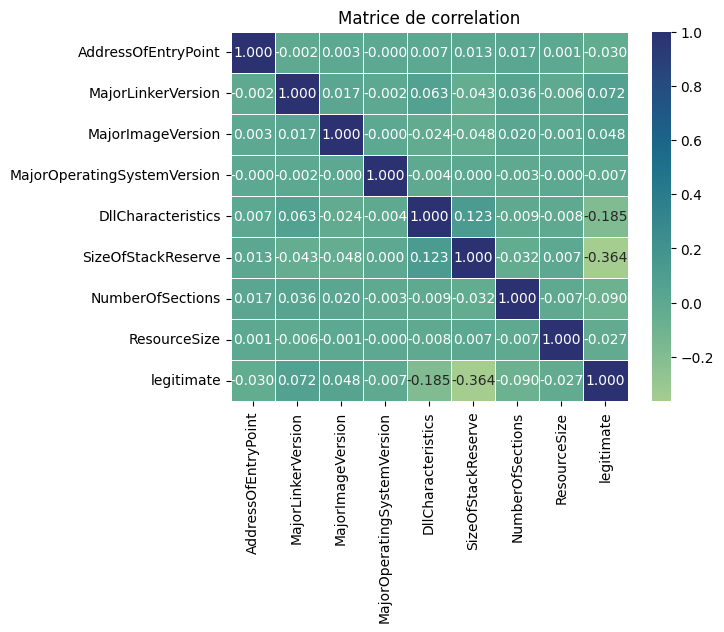

In [16]:
sns.heatmap(dataset.corr(), annot=True, cmap='crest', linewidths=.5, fmt=".3f")
plt.title("Matrice de correlation")
plt.show()

# 5. Séparation du dataset en données d'entraînement et de test

In [17]:
# Extraction du feature et target
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [18]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
def modeles_resultats(X_train, y_train, X_test, y_test, model):
    
    # 6. Entraînement des modèles
    model.fit(X_train, y_train)

    # 7. Prédiction avec les modèles
    y_pred = model.predict(X_test)
    
    try:
        
        # 8. Évaluation des performances des modèles
        dico_indices_performances = {"Exactitude: " : accuracy_score(y_test, y_pred), "Précision: " : precision_score(y_test, y_pred), "Recupération: ": recall_score(y_test, y_pred), "Score F1: ": f1_score(y_test, y_pred), "Matrice de confusion": confusion_matrix(y_test, y_pred)}
        for _ in dico_indices_performances:
            print(f'{_}: \n {dico_indices_performances[_]}')

    except AttributeError:
        pass

In [20]:
# Modèle avec l'algorithme KNN
model_Knn = KNeighborsClassifier()
modeles_resultats(X_train, y_train, X_test, y_test, model_Knn)

Exactitude: : 
 0.8778696051423324
Précision: : 
 0.9046581312993734
Recupération: : 
 0.9303824064995098
Score F1: : 
 0.9173399627097576
Matrice de confusion: 
 [[1962  700]
 [ 497 6642]]


In [21]:
# Modèle avec l'algorithme Random Forest
model_RandomForest = RandomForestClassifier(n_estimators=20, n_jobs=1, random_state=5)
modeles_resultats(X_train, y_train, X_test, y_test, model_RandomForest)

Exactitude: : 
 0.9585756555453525
Précision: : 
 0.9738212526389867
Recupération: : 
 0.9691833590138675
Score F1: : 
 0.9714967705700646
Matrice de confusion: 
 [[2476  186]
 [ 220 6919]]


In [22]:
# Modèle avec l'algorithme Decision Tree
model_DecisionTree = DecisionTreeClassifier()
modeles_resultats(X_train, y_train, X_test, y_test, model_DecisionTree)

Exactitude: : 
 0.9428629731660034
Précision: : 
 0.9620733249051833
Recupération: : 
 0.9593780641546436
Score F1: : 
 0.9607238041801094
Matrice de confusion: 
 [[2392  270]
 [ 290 6849]]


In [23]:
model_Log = LogisticRegression(C=1.0, random_state= 20, max_iter= 100)
modeles_resultats(X_train, y_train, X_test, y_test, model_Log)

Exactitude: : 
 0.7293133353739414
Précision: : 
 0.7295333606221859
Recupération: : 
 0.9985992435915394
Score F1: : 
 0.843119862811188
Matrice de confusion: 
 [[  19 2643]
 [  10 7129]]


/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 9. Distribution de la variable cible "legitimate"

In [24]:
occ

legitimate
1    23866
0     8804
Name: count, dtype: int64

Exactitude: : 
 0.9585756555453525
Précision: : 
 0.9738212526389867
Recupération: : 
 0.9691833590138675
Score F1: : 
 0.9714967705700646
Matrice de confusion: 
 [[2476  186]
 [ 220 6919]]
Exactitude: : 
 0.9585756555453525
Précision: : 
 0.9738212526389867
Recupération: : 
 0.9691833590138675
Score F1: : 
 0.9714967705700646
Matrice de confusion: 
 [[2476  186]
 [ 220 6919]]
Exactitude: : 
 0.9435771860014285
Précision: : 
 0.9635416666666666
Recupération: : 
 0.9588177615912593
Score F1: : 
 0.9611739099908727
Matrice de confusion: 
 [[2403  259]
 [ 294 6845]]
Exactitude: : 
 0.9431690643811856
Précision: : 
 0.9632601351351351
Recupération: : 
 0.9585376103095672
Score F1: : 
 0.9608930702801376
Matrice de confusion: 
 [[2401  261]
 [ 296 6843]]
Exactitude: : 
 0.8778696051423324
Précision: : 
 0.9046581312993734
Recupération: : 
 0.9303824064995098
Score F1: : 
 0.9173399627097576
Matrice de confusion: 
 [[1962  700]
 [ 497 6642]]
Exactitude: : 
 0.8778696051423324
Précision: : 
 

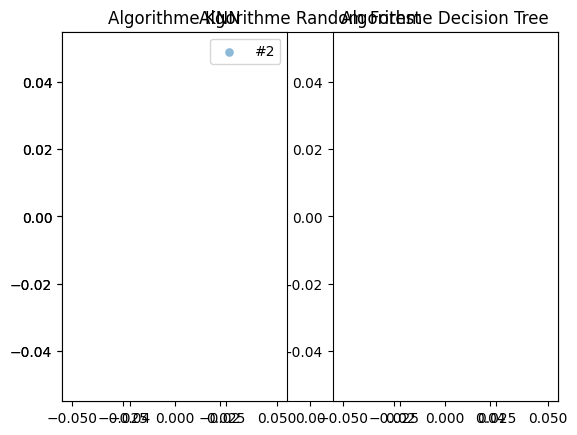

In [25]:
plt.subplot(1, 1, 1)
plt.scatter(modeles_resultats(X_train, y_train, X_test, y_test, model_RandomForest), modeles_resultats(X_train, y_train, X_test, y_test, model_RandomForest), label="#0", alpha=0.5, linewidth=0.15)
plt.title('Algorithme Random Forest')
plt.subplot(1, 2, 2)
plt.scatter(modeles_resultats(X_train, y_train, X_test, y_test, model_DecisionTree), modeles_resultats(X_train, y_train, X_test, y_test, model_DecisionTree), label="#1", alpha=0.5, linewidth=0.15)
plt.title('Algorithme Decision Tree')
plt.subplot(1, 2, 1)
plt.scatter(modeles_resultats(X_train, y_train, X_test, y_test, model_Knn), modeles_resultats(X_train, y_train, X_test, y_test, model_Knn), label="#2", alpha=0.5, linewidth=0.15)
plt.title('Algorithme KNN')

# Affichage des graphiques
plt.legend()
plt.show()

In [26]:
models = {}
models['Decision Tree Classifier'] = DecisionTreeClassifier()
models['Random Forest Classifier'] =random_forest= RandomForestClassifier()
models['KNeighbors'] = KNeighborsClassifier()
import time

train_score, accuracy, precision, recall, training_time, y_pred = {}, {}, {}, {}, {}, {}
for key in models.keys():
    start_time = time.time()
    models[key].fit(X_train, y_train)
    training_time[key] = time.time() - start_time
    y_pred[key] = models[key].predict(X_test)
    train_score[key] = models[key].score(X_train, y_train)
    accuracy[key] = models[key].score(X_test, y_test)
    precision[key] = precision_score(y_test, y_pred[key])
    recall[key] = recall_score(y_test, y_pred[key])


df_models = pd.DataFrame(index=models.keys(), columns=['Training score', 'Accuracy', 'Precision', 'Recall', 'Training time'])
df_models['Training score'] = train_score.values()
df_models['Accuracy'] = accuracy.values()
df_models['Precision'] = precision.values()
df_models['Recall'] = recall.values()
df_models['Training time'] = training_time.values()

df_models

,Training score,Accuracy,Precision,Recall,Training time
Decision Tree Classifier,0.999213,0.943271,0.962354,0.959658,0.099707
Random Forest Classifier,0.999213,0.959698,0.973330,0.971284,1.757344
KNeighbors,0.913070,0.877870,0.904658,0.930382,0.011085
